### 04. Pytorch Custom Dataset


How do you get your own data into Pytorch?

One of the ways to do so is via custom datasets

## Domain libraries
Depending on what you're working on, you'll want to look into each of the pytorch existing data loading functions and customizable data loading functions.

In [1]:
import torch
from torch import nn


In [2]:
device = "cuda" if torch.cuda.is_available() else 'cpu'

### 1. Get data

Our dataset is a subset of Food101 dataset.
Food101 starts 101 different classes of food and 1000 images per class, 750 : training, 250 : testing.

Our dataset starts with 3 classes of food and only 10% of the images (~75 training, 25 testing)

Why do this?

When starting out ML projects, it's important to try things on small scale and then increase the scale when necessary. 
The whole point is to speed up how fast you can experiment.

In [3]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path('./data/')
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory already exists.. skip downloading")
else:
    print(f'{image_path} doesnt exists, creating one..')
    image_path.mkdir(parents=True, exist_ok=True)
with open(data_path / "pizza_steak_sushi.zip" , 'wb') as f:
    request = requests.get('https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip') 
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / 'pizza_steak_sushi.zip','r') as zip_ref:
    print("Unzipping pizza, steak and sushi data...")
    zip_ref.extractall(image_path)



data\pizza_steak_sushi directory already exists.. skip downloading
Unzipping pizza, steak and sushi data...


### 2. Becoming one with data (data preparation)

In [4]:
import os
def walk_through_dir(dir_path):
    """Walks through dir_path returning its contents"""
    for dirpath, dirnames, filenames in os.walk(dir_path):
        print(f"tThere are {len(dirnames)} in directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
walk_through_dir(image_path)

tThere are 2 in directories and 0 images in 'data\pizza_steak_sushi'.
tThere are 3 in directories and 0 images in 'data\pizza_steak_sushi\test'.
tThere are 0 in directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
tThere are 0 in directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
tThere are 0 in directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
tThere are 3 in directories and 0 images in 'data\pizza_steak_sushi\train'.
tThere are 0 in directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
tThere are 0 in directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
tThere are 0 in directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [6]:
train_dir = image_path  / "train"
test_dir = image_path / "test"
train_dir

WindowsPath('data/pizza_steak_sushi/train')

### 2.1 Visualizing images

Write some codes to:
1. Get all of the image paths
2. Pick a random image path using python''s random choice()
3. Get the imgage class name using `pathlib.Path.parent.stem`
4. Since we're working images, let's open the image with pythons PIL.
5. We'll then show the image and print metadata

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/2124579.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/2218680.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/2236338.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/2508636.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/2871261.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/3092704.jpg'), WindowsPath('data/pizza_steak_sushi/test/pizza/309892.jpg'), WindowsPat

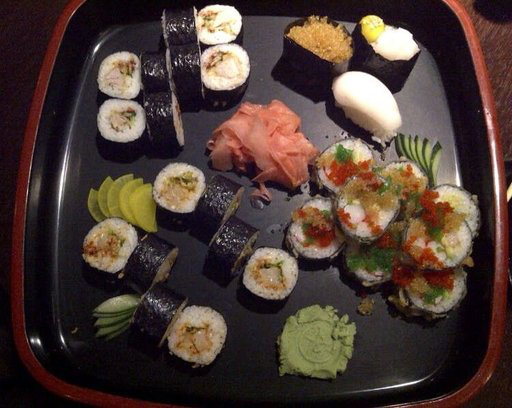

In [7]:
import random
from PIL import Image

# Set seed
random.seed(42)

# 1. Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
print(image_path_list)

# 2. Pick a random image path
random_image_path = random.choice(image_path_list)
print(random_image_path)

# 3. Get image class from path name
image_class = random_image_path.parent.stem
print(image_class)

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image  path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height : {img.height}")
print(f"Image width: {img.width}")

img

(-0.5, 511.5, 407.5, -0.5)

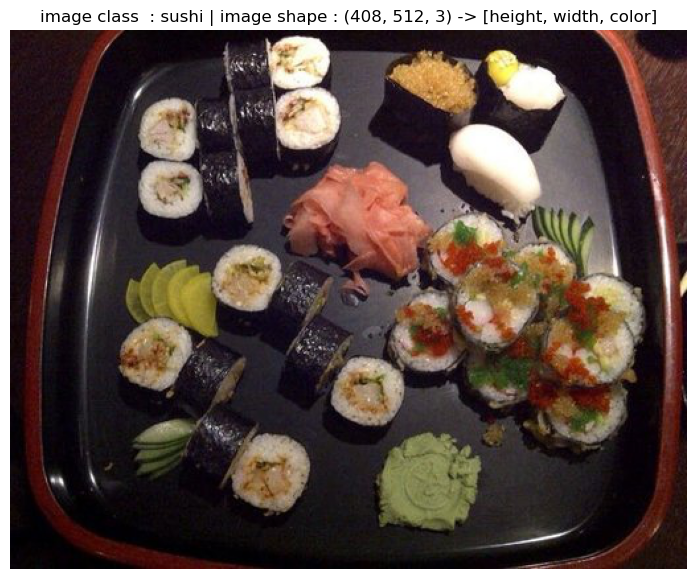

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Turn the image into an array
img_as_array = np.asarray(img)

# Plot the image with plt
plt.figure(figsize = (10,7))
plt.imshow(img_as_array)
plt.title(f"image class  : {image_class} | image shape : {img_as_array.shape} -> [height, width, color]")
plt.axis(False)

### 3. Transforming data

Before we can use our image data with pytorch: 
1. Turn you target data into tensors .
2. Turn it into a `torch.utils.data.Dataset` and subsequently a `torch.utils.data.DatalLoader`

In [14]:
import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms


### 3.1 Transforming data with torchvision.transforms


In [15]:
# Write a transform for image

data_transform = transforms.Compose([
    # Resize our images to 64*64
    transforms.Resize(size = (64,64)),
    # Flip the images randomly on the horizental
    transforms.RandomHorizontalFlip(p=0.5),
    # Turn the image into a torch.Tensor
    transforms.ToTensor()
])






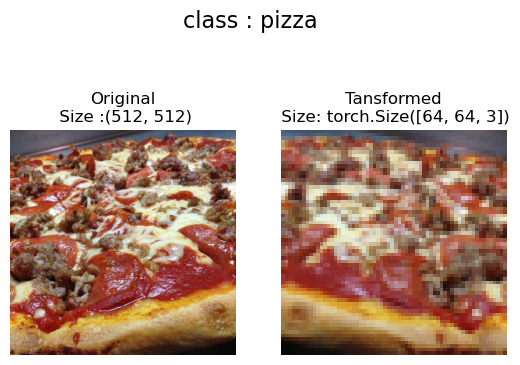

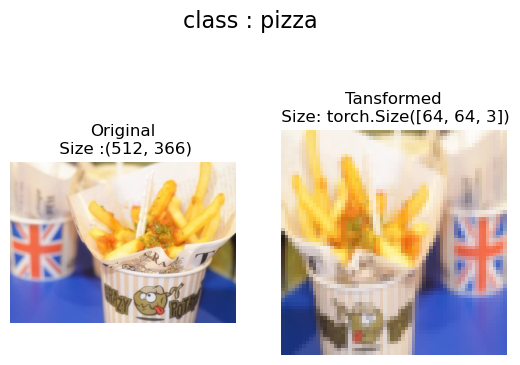

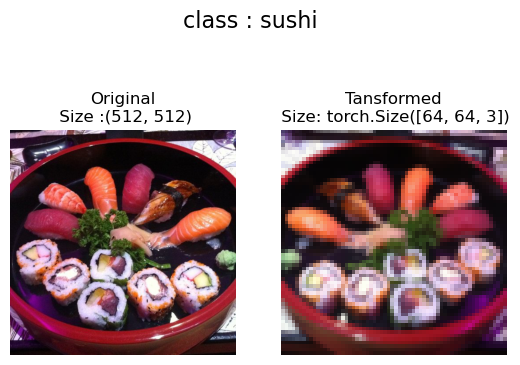

In [26]:
def plot_transformed_images(image_paths, transform, n=3, seed=None):
    """
    selects random images from a path of images loads/transforms them then plots the original vs the tranformed version.
    """
    if seed:
        random.seed(42)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(nrows = 1, ncols = 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original\n Size :{f.size}")
            ax[0].axis(False)

            # Transform and plot target image
            transformed_image = transform(f).permute(1,2,0) # change to (H,W,C)
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Tansformed\n Size: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"class : {image_path.parent.stem}",fontsize = 16)


plot_transformed_images(image_paths = image_path_list, transform=data_transform)


## 4. Option 1 : Loading image data using `imagefolder`

We can load image classification data using `torchvision.datasets.ImageFolder`

In [33]:
# Use ImageFolder to create datasets

from torchvision import datasets
train_data = datasets.ImageFolder(root = train_dir, transform = data_transform, target_transform = None)


test_data = datasets.ImageFolder(
    root = test_dir, transform=data_transform
)

In [41]:
# Get class names as list
class_names = train_data.classes
# Get class names as dict
class_dicts = train_data.class_to_idx

In [42]:
len(train_data), len(test_data)

(225, 75)

In [43]:
img, label = train_data[0]
class_names[label]

'pizza'

Text(0.5, 1.0, 'pizza')

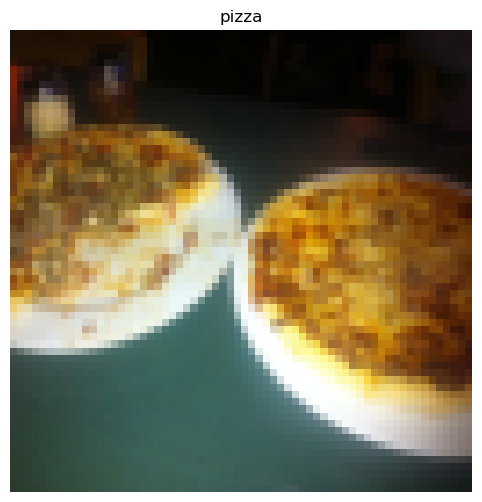

In [46]:
plt.figure(figsize=(10,6))
plt.imshow(img.permute(1,2,0))
plt.axis('off')
plt.title(class_names[label])

### 4.1 Turned loaded images into `DataLoader`'s 

A `DataLoader` is going to help us turn our `Dataset` 's into iterables and we can customize the `batch_size` so our model can see batch_size images at a time

In [57]:
import os
os.cpu_count()

# Num of cpu cores


8

In [67]:
# Turn train and test datasets into Dataloader
import os
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, num_workers=os.cpu_count(), shuffle=True)
test_dataloader = DataLoader(dataset= test_data, batch_size=BATCH_SIZE, num_workers=os.cpu_count(), shuffle=False)

In [66]:
img, label = next(iter(train_dataloader))

# Batch size will now be 1 , you can change the batch size as you like

print(f"Image shape: {img.shape} -> [batch_size, color_channels, height, width]")

Image shape: torch.Size([1, 3, 64, 64]) -> [batch_size, color_channels, height, width]


### 5. option 2: Loading Image Data with a Custom Dataset

1. Want to be able to load images from file
2. Want to be able to get class names from the Dataset
3. Want to be able to get classes as dictionary from the dataset

Pros: 
* Can create a `Dataset` out of almost anything
* Not limited to pytorch `pre-built` Dataset functions

Cons:
* Even though you could create `Dataset` out of almost anything, it doesn't mean it will work..
* Using a custom `Dataset` often results in us writing more code, which could be prone to errors or performance issues  

In [68]:
import os
import pathlib
import torch

from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
from typing import Tuple,Dict, List



In [69]:
# Instance of torchvision.datasets.ImageFolder()

train_data.classes, train_data.class_to_idx

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.1 Creating a helper function to get class names

We want a function to:
1. Get the class names using `os.scandir()` to traverse a target directory
2. Raise an error if the class names aren't found.
3. Turn the class names into a dict and a list and return them.

In [74]:
# Setup path for target directory

target_directory = train_dir
print(f"Target dir : {target_directory}")


# Get the class names from the target dir
class_name_found = sorted([entry.name for entry in list(os.scandir(target_directory))])
class_name_found

Target dir : data\pizza_steak_sushi\train


['pizza', 'steak', 'sushi']

In [75]:
list(os.scandir(target_directory))

[<DirEntry 'pizza'>, <DirEntry 'steak'>, <DirEntry 'sushi'>]

In [77]:
def find_classes(directory:str) -> Tuple[List[str], Dict[str,int]]:
  """Finds the class folder names in a target dir"""
  # 1. Get the class names by scanning the target directory
  classes = sorted(entry.name for entry in os.scandir(target_directory) if entry.is_dir())

  # 2. Raise an error if class names could not be found
  if not classes:
    raise FileNotFoundError(f"Couldn't find any classes in {directory}...")
  
  # 3. Create a dictionary of index labels
  class_to_idx = {class_name: i for i , class_name in enumerate(classes)}
  return classes, class_to_idx

find_classes(directory=target_directory)

(['pizza', 'steak', 'sushi'], {'pizza': 0, 'steak': 1, 'sushi': 2})

### 5.2 Create a custom `dataset` to replicate `ImageFolder`

To create our own custom dataset, we want to:

1. Subclass `torch.utils.data.Dataset`
2. Init our subclass with a target directory (the directory we'd like to get data from) as
well as a transform if we'd like to transform our data.
3. Create several attributes:
  * paths - paths of our images
  * transform - the transform we'd like to use
  * classes - a list of the target classes
  * class_to_idx - a dict of the target classes mapped to integer data
4. Create a function to `load_iamges()` , this function will open an image
5. Overwrite the `__len()__` method to return the length of our dataset
6. Overwrite the `__getitem()__` method to return a given sample when passed an index

In [95]:
# 0. Write a custom dataset class
from torch.utils.data import Dataset

# 1. Subclass torch.utils.data.Dataset
class ImageFolderCustom(Dataset):
  # 2. Initialize our custom dataset:
  def __init__(self, targ_dir : str, transform = None):
    # Create class attributes
    # Get all of the image paths
    self.paths = list(pathlib.Path(targ_dir).glob("*/*.jpg"))
    self.transform = transform
    # Create classes and class_to_idx
    self.classes, self.class_to_idx = find_classes(targ_dir)
  
  # 4. Create a function to load images
  def load_image(self, index:int)-> Image.Image:
    image_path = self.paths[index]
    return Image.open(image_path)
  
  # 5. Overwrite the __len()__ method 
  def __len__(self) -> int : 
    return len(self.paths)
  
  # 6. Overwrite the __getitem__
  def __getitem__(self,index : int) ->Tuple[torch.Tensor, int]:
    "Returns one sample of data, data and label (X,y)"
    img  = self.load_image(index)
    class_name = self.paths[index].parent.name 
    class_idx = self.class_to_idx[class_name]

    if self.transform:
      return self.transform(img), class_idx
    else:
      return img, class_idx

In [101]:
# Create a transform
train_transforms = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

test_transforms = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
])

In [102]:
train_data_custom = ImageFolderCustom(targ_dir=train_dir, transform= train_transforms)
test_data_custom = ImageFolderCustom(targ_dir=test_dir, transform=test_transforms)

In [106]:
train_data_custom.transform

Compose(
    Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=None)
    RandomHorizontalFlip(p=0.5)
    ToTensor()
)

### 5.3 Create a function to display random images

1. Take in a `Dataset` and a number of other parameters such as class names and how many images to visualize.

2. To prevent the display getting out of hand, let's cap the num of images to see at 10.
3. Set the random seed for reproducibility.
4. Get a list of random sample indexes from target dataset.
5. Setup a matplotlib plot.
6. Loop through the random sample images and plot them with matplotlib.
7. Make sure the dimensions of our images line up with matplotlib

In [107]:
# 1. Create a function to take in a dataset

def display_random_images(dataset : torch.utils.data.dataset, classes:List[str] = None, n: int=10, display_shape : bool=True , seed:int=None):
  # 2. Adjust display if n is too high.
  if n>10:
    n=10
    display_shape = False
  
  # 3. Set the seed
  if seed:
    random.seed(seed)
  
  # 4. Get random sample indexes
  random_sample_idx = random.sample(range(len(dataset)), k=n)
  
  # 5. Setup plot
  plt.figure(figsize =(16,8))


  # 6. Loop through the random sample images and plot them
  for i, targ_sample in enumerate(random_sample_idx):
    targ_image, targ_label = dataset[targ_sample]

    # 7. Adjust tensor dims for plot
    targ_image_adjust = targ_image.permute(1,2,0)
    
    # Plot adjusted images
    plt.subplot(1,n,i+1)
    plt.imshow(targ_image_adjust)
    plt.axis("off")
    if classes:
      title = f"Class : {classes[targ_label]}"
      if display_shape:
        title = title + f"\nShape : {targ_image_adjust.shape}"
    plt.title(title)

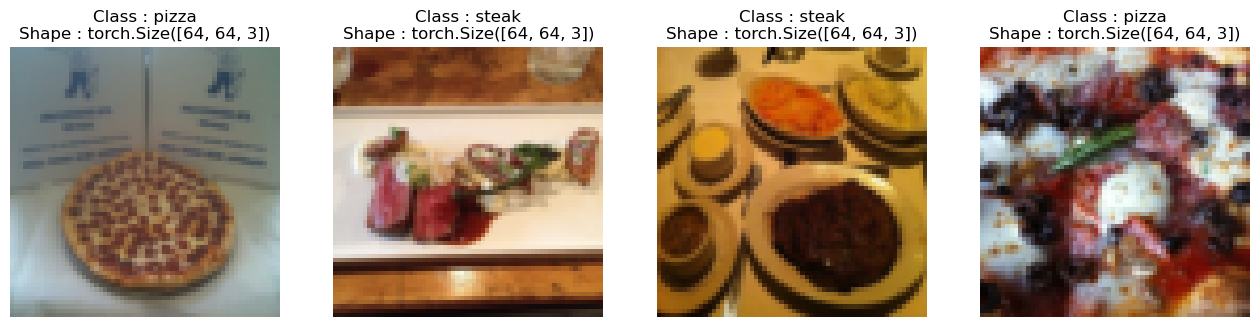

In [120]:
display_random_images(dataset=test_data_custom, n=4, classes=class_names, seed = None)

### 5.4 Turn custom laoded images into `DataLoader`'s

In [122]:
from torch.utils.data import DataLoader
BATCH_SIZE = 32
train_dataloader_custom  = DataLoader(dataset = train_data_custom, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)
test_dataloader_custom = DataLoader(dataset = test_data_custom, batch_size = BATCH_SIZE, shuffle=False, num_workers=0)

In [125]:
# Get image and label from custom dataloader
img_custom, label_custom  = next(iter(train_dataloader_custom))

img_custom.shape, label_custom.shape

(torch.Size([32, 3, 64, 64]), torch.Size([32]))

### 6. Other transforms and Data augmentation

In [151]:
### Let's look at TrivialAugment

from torchvision import transforms

train_transform =  transforms.Compose([
    transforms.Resize(size = (224,224)),
    transforms.TrivialAugmentWide(num_magnitude_bins=31),
    transforms.ToTensor()
])

test_transform = transforms.Compose([
    transforms.Resize(size = (224,224)),
    transforms.ToTensor()
])

In [152]:
data_path = pathlib.Path('./data')
image_path = data_path / "pizza_steak_sushi"
image_path

WindowsPath('data/pizza_steak_sushi')

In [153]:
# Get all image paths
image_path_list = list(image_path.glob("*/*/*.jpg"))
image_path_list[:10]

[WindowsPath('data/pizza_steak_sushi/test/pizza/1152100.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1503858.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1687143.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/1925494.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/194643.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/195160.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2003290.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2019408.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2111981.jpg'),
 WindowsPath('data/pizza_steak_sushi/test/pizza/2124579.jpg')]

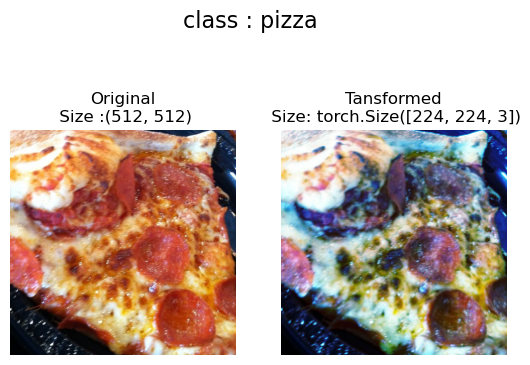

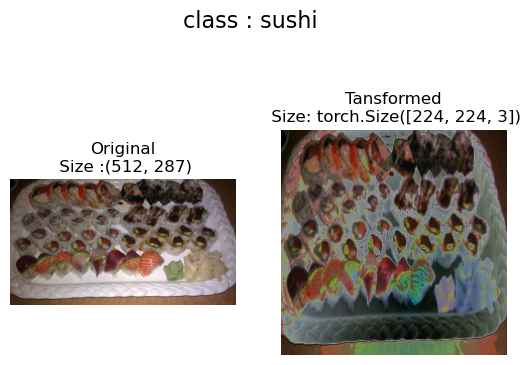

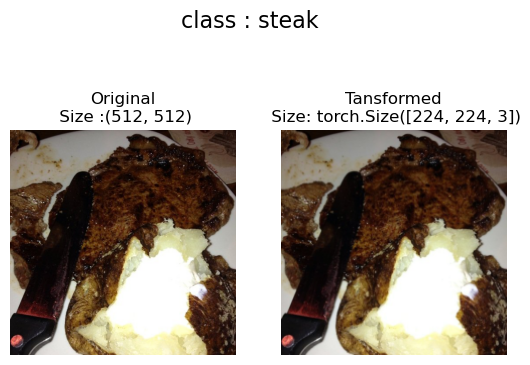

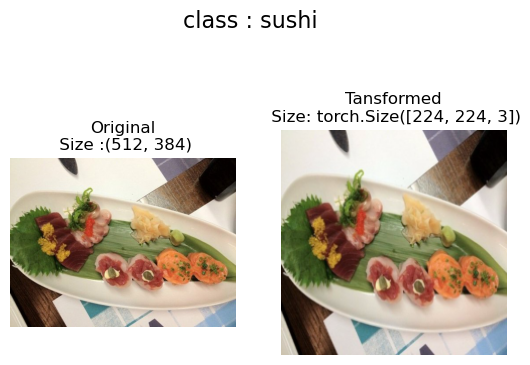

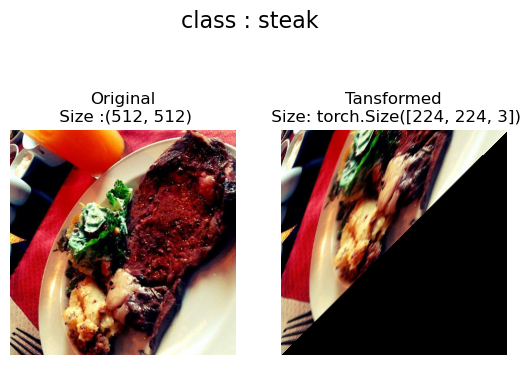

In [159]:
# Plot random transformed images
plot_transformed_images(
    image_paths = image_path_list,
    transform = train_transform,
    n=5, 
    seed = None
)

### 7. Model 0: TinyVGG with out data augmentation

### 7.1 Creating transfomrs and loading data for model 0

In [160]:
# Create simple transform
simple_transform = transforms.Compose([
    transforms.Resize(size = (64,64)),
    transforms.ToTensor()
])

In [163]:
train_dir = image_path / "train"
test_dir = image_path / "test"

In [170]:
import torchvision
train_data_simple = torchvision.datasets.ImageFolder(root = train_dir, transform = simple_transform)
test_data_simple = torchvision.datasets.ImageFolder(root = test_dir, transform=simple_transform)
train_dataloader = torch.utils.data.DataLoader(dataset=train_data, batch_size=32, shuffle=True,num_workers=os.cpu_count())
test_dataloader = torch.utils.data.DataLoader(dataset = test_data, batch_size = 32, shuffle=False, num_workers=os.cpu_count())

### 7.2 Create TinyVGG model class

In [172]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape:int, hidden_units:int, output_shape:int) -> None:
    super().__init__()
    self.conv_block1 = nn.Sequential(
      nn.Conv2d(in_channels=input_shape, out_channels=hidden_units, stride=1, padding=1, kernel_size=3),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, stride=1, padding=1, kernel_size=3),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2, stride = 2)
    )
    self.conv_block2 = nn.Sequential(
      nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, stride=1, padding=1, kernel_size=3),
      nn.ReLU(),
      nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, stride=1, padding=1, kernel_size=3),
      nn.ReLU(),
      nn.MaxPool2d(kernel_size=2, stride = 2)
    )
    self.classifier = nn.Sequential(
      nn.Flatten(),
      nn.Linear(hidden_units*8*8, output_shape)
    )

In [173]:
img,label = train_data[0]


In [174]:
img.shape

torch.Size([3, 64, 64])